### StrainDataSplitter: Class

### 定数を定義

No constants are required right now

### 変数の定義
 適宜変更する

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from da_libraries.arrange_data import StrainDataSplitter

%matplotlib inline

In [2]:
help(StrainDataSplitter)

Help on class StrainDataSplitter in module kubota_libraries.arrange_data:

class StrainDataSplitter(DataOrganizer)
 |  StrainDataSplitter(should_normalize_data: bool = False, should_flatten_data: bool = False, m: int = 0, frequency_c: int = 0)
 |  
 |  ひずみデータの管理、CSVとデータフレームの相互変換、周期の抽出を行うクラス
 |  
 |  Method resolution order:
 |      StrainDataSplitter
 |      DataOrganizer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, should_normalize_data: bool = False, should_flatten_data: bool = False, m: int = 0, frequency_c: int = 0)
 |      Args:
 |          should_normalize_data: データを標準化するかどうか (bool)
 |          should_flatten_data: データを平滑化するかどうか (bool)
 |          m: 平滑化のパラメータm (int)
 |          frequency_c: 平滑化のパラメータfrequency_c (int)
 |  
 |  save_data(self, file_format: str) -> None
 |      この関数は指定されたフォーマットでデータを保存します。サポートされているフォーマットは 'csv', 'pkl', 'npy' です。
 |      'csv' および 'pkl' の場合、split_strain_data_dfs の各データフレームは別々のファイルに保存されます。
 |      'npy' の場合は、すべてのデータフレー

実験データをスプリットしたCSV file, pngを作る

In [3]:
split_num = 5

In [4]:
strain_data_splitter = StrainDataSplitter(should_flatten_data=True,should_normalize_data=True, m=1050, frequency_c=20)

No offset is conducted


  0%|          | 0/11 [00:00<?, ?it/s]

0deg: 2
10deg: 2
20deg: 2
30deg: 2
40deg: 2
50deg: 2
60deg: 2
70deg: 2
80deg: 2
90deg: 2
No Wind: 2
No offset is conducted


  0%|          | 0/11 [00:00<?, ?it/s]

0deg: 2
10deg: 2
20deg: 2
30deg: 2
40deg: 2
50deg: 2
60deg: 2
70deg: 2
80deg: 2
90deg: 2
No Wind: 2
Found 11 folders.
After checking the graph of raw data (arranged_strain_dataframes), implement get_split_strain_data_dfs.


In [36]:
strain_data_splitter.update_filter_parameters(m=1020, frequency_c=20)

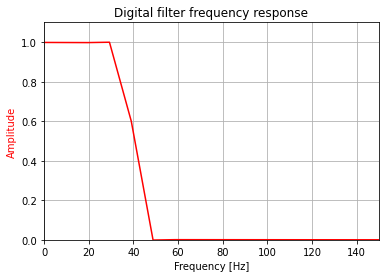

In [37]:
should_db = False

w, amp_dB = strain_data_splitter.calculate_filter_frequency_response(should_db=should_db)

# プロット
fig = plt.figure()
plt.title('Digital filter frequency response')
ax = plt.gca()
ax.set_xlim([0, 150])
ax.set_ylim([0, 1.1])

# 振幅応答のプロット
# ax1 = fig.add_subplot(111)
plt.plot(w, amp_dB, 'r')

if should_db:
    plt.ylabel('Amplitude [dB]', color='r')
else:
    plt.ylabel('Amplitude', color='r')

plt.xlabel('Frequency [Hz]')
plt.grid()
# ax1.set_ylim(np.minimum(ylim_min_dB, np.min(amp_dB)), 0)

plt.show()

# fig.figure.savefig("filter.png")

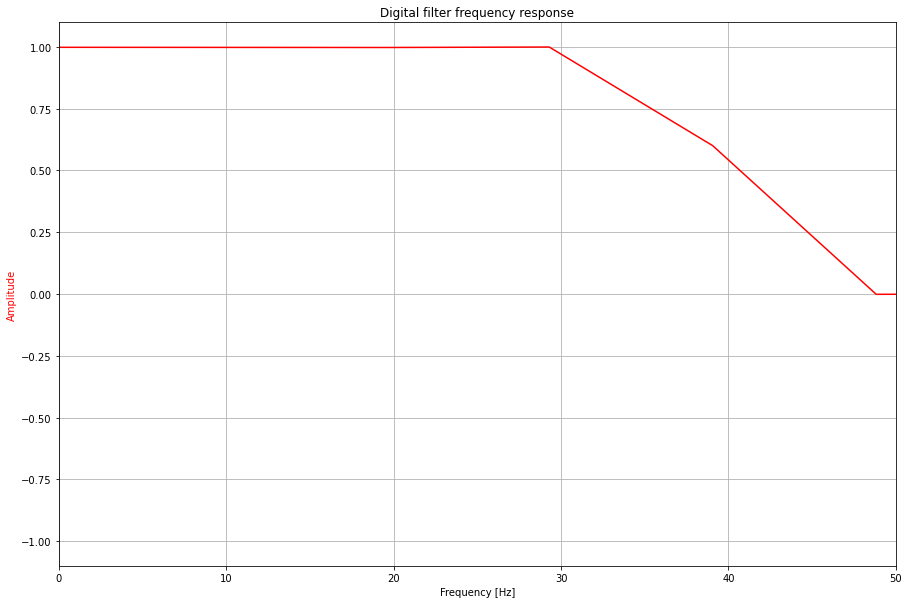

In [38]:
should_db = False
file_name = "filter2.svg"

w, amp_dB = strain_data_splitter.calculate_filter_frequency_response(should_db=should_db)

# プロット
fig = plt.figure(figsize=(15, 10))
plt.title('Digital filter frequency response')
ax = plt.gca()
ax.set_xlim([0, 50])
ax.set_ylim([-1.1, 1.1])

# 振幅応答のプロット
# ax1 = fig.add_subplot(111)


plt.plot(w, amp_dB, 'r')

if should_db:
    plt.ylabel('Amplitude [dB]', color='r')
else:
    plt.ylabel('Amplitude', color='r')

plt.xlabel('Frequency [Hz]')
plt.grid()
# ax1.set_ylim(np.minimum(ylim_min_dB, np.min(amp_dB)), 0)


plt.show()

In [39]:
# fig.figure.savefig(file_name)

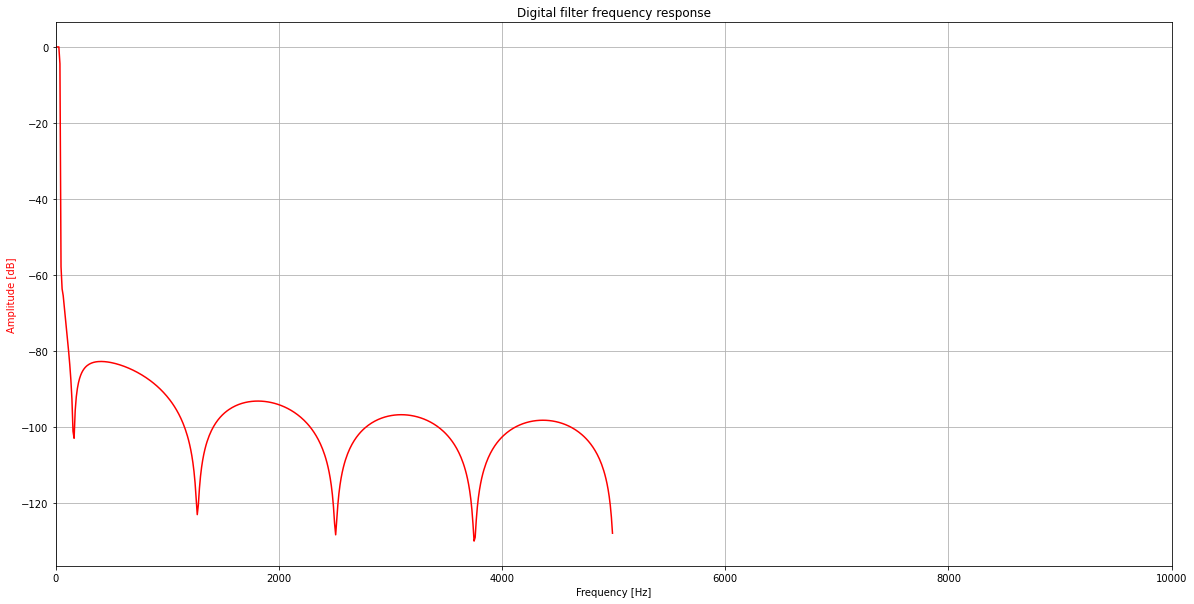

In [40]:
should_db = True
file_name = "filter2_db.svg"

w, amp_dB = strain_data_splitter.calculate_filter_frequency_response(should_db=should_db)

# プロット
fig = plt.figure(figsize=(20, 10))
plt.title('Digital filter frequency response')
ax = plt.gca()
ax.set_xlim([0, 10000])
# ax.set_ylim([-1.1, 1.1])

# 振幅応答のプロット
# ax1 = fig.add_subplot(111)


plt.plot(w, amp_dB, 'r')

if should_db:
    plt.ylabel('Amplitude [dB]', color='r')
else:
    plt.ylabel('Amplitude', color='r')

plt.xlabel('Frequency [Hz]')
plt.grid()
# ax1.set_ylim(np.minimum(ylim_min_dB, np.min(amp_dB)), 0)


plt.show()

In [41]:
# fig.figure.savefig(file_name)

In [42]:
# split_num = 6
# strain_data_splitter.split_strain_data("random", split_num)

time_over_period = 0.5
strain_data_splitter.split_strain_data("period", time_over_period)

  0%|          | 0/11 [00:00<?, ?it/s]

0deg: 920
10deg: 920
20deg: 920
30deg: 920
40deg: 920
50deg: 920
60deg: 920
70deg: 920
80deg: 920
90deg: 920
No Wind: 920


In [43]:
for time_over_period in [0.1, 0.2, 0.5, 1]:
    strain_data_splitter.split_strain_data("period", time_over_period)
    strain_data_splitter.save_data("pkl")
    strain_data_splitter.save_data("npy")

Data is already flattened.
0deg: 4676
10deg: 4676
20deg: 4676
30deg: 4676
40deg: 4676
50deg: 4676
60deg: 4676
70deg: 4676
80deg: 4676
90deg: 4676
No Wind: 4676
Didn't save 0 dataframes.
Data is already flattened.
0deg: 2308
10deg: 2308
20deg: 2308
30deg: 2308
40deg: 2308
50deg: 2308
60deg: 2308
70deg: 2308
80deg: 2308
90deg: 2308
No Wind: 2308
Didn't save 0 dataframes.
Data is already flattened.
0deg: 920
10deg: 920
20deg: 920
30deg: 920
40deg: 920
50deg: 920
60deg: 920
70deg: 920
80deg: 920
90deg: 920
No Wind: 920
Didn't save 0 dataframes.
Data is already flattened.
0deg: 460
10deg: 460
20deg: 460
30deg: 460
40deg: 460
50deg: 460
60deg: 460
70deg: 460
80deg: 460
90deg: 460
No Wind: 460
Didn't save 0 dataframes.
